# (First part of the code from the joint coding session)

In [1]:
import pandas as pd
import numpy as np
import re
import string

    pandas = library - use for data manipulations
    numpy = library - use for numerical computing
    re = use to get rid of any special characters/symbols for in the text that may interupt any numerical computations

In [2]:
df_fake = pd.read_csv('csv files/Fake.csv')
df_true = pd.read_csv('csv files/True.csv')

    pd.read_csv code 
are based on the location of the csv file on my computer.

In [3]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df_fake = df_fake.drop(['date','subject','title'], axis = 1)
df_fake

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


 We got rid of date, subject and title columns to not confuse our algorithm using the drop function.

In [5]:
df_fake['label'] = 0
df_fake

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [6]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
df_true = df_true.drop(['date','subject','title'], axis = 1)
df_true

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,MINSK (Reuters) - In the shadow of disused Sov...
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


 We got rid of date, subject and title columns, again, to not confuse our algorithm using the drop function.

In [8]:
df_true['label'] = 1
df_true

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


*Checking if the number of true articles are about the same number of fake articles in the data set.

    df.shape = (number of rows = number of true/fake articles, number of columns)

In [9]:
df_fake.shape, df_true.shape

((23481, 2), (21417, 2))

Hence, the number of true articles are about the same number of fake articles.

In [10]:
frames = [df_fake, df_true]
df = pd.concat(frames)
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


    0 = fake article
    1 = true article

In [11]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', "", text)
    text = re.sub("\\W", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]'%re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
df["text"] = df["text"].apply(word_drop)
df

,text,label
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0
...,...,...
21412,brussels reuters nato allies on tuesday we...,1
21413,london reuters lexisnexis a provider of l...,1
21414,minsk reuters in the shadow of disused sov...,1
21415,moscow reuters vatican secretary of state ...,1


*shuffling the data frame, mixing up the True and Fake articles in the data frame.

In [13]:
df = df.sample(frac=True)
df

,text,label
4164,donald trump has been coming apart at the seam...,0
12653,brasilia reuters the centrist brazilian so...,1
6154,washington reuters president donald trump ...,1
6539,washington reuters the u s congress taki...,1
9676,hillary clinton praised london s socialized me...,0
...,...,...
17437,where was the media coverage when this black t...,0
15954,ten things that we have learned from hurricane...,0
13635,washington reuters u s secretary of state...,1
10860,new york reuters a campaign advisor and lo...,1


# *Vectorisation of text data

In [14]:
df.isnull().sum()

text     0
label    0
dtype: int64

Converting text data 
    
    df -> into series of numerical values 
that can be compared to the label, showing that whether the model can predicted fake news correctly. 

In [15]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
x[0]

array(['donald trump has been coming apart at the seams before our very eyes  the public has noticed  certainly  but so has someone else  democratic vice presidential nominee tim kaine  hillary clinton s veep said the following of trump s attempts to blame the rest of the world for the accusations of groping that keep coming out against him  he is swinging at every phantom of his own imagination because he knows he s losing  these remarks were made on abc s this week  and kaine also made it crystal clear that trump s allegations that hillary s campaign had anything to do with the avalanche of unflattering stories that have come out ever since trump was caught on a hot mic with then access hollywood host billy bush  insisting that he could do anything he wanted to women because he is a star while discussing trump  kaine also reminded america of the orange buffoon s bullying behavior  and said that the hot mic tape is what gave these women the courage to tell the stories of their experie

In [17]:
y[0]

0

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['text'], df['label'], train_size=0.7, test_size=0.3, random_state=0)

Here, we have 

    x = text data
    y = label value
where the text data(x) is trained to correctly pair up with its corresponding label(y), then this is tested out to check how consistent model(s) predicts article as Fake/True article (1/0).

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31428,), (31428,), (13470,), (13470,))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorisation = TfidfVectorizer()
xv_train = vectorisation.fit_transform(x_train)
xv_test = vectorisation.transform(x_test)

Now we have vectorised the text data.

# *Testing out models and comparing its accuracy scores

### *Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)
LR.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
LR.score(xv_test, y_test)

0.9867112100965107

In [23]:
print(f'{LR.score(xv_test, y_test)*100}%')

98.67112100965107%


In [24]:
print(f'{round(LR.score(xv_test, y_test)*100,2)}% accuracy')

98.67% accuracy


In [25]:
y_pred_LR = LR.predict(xv_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_LR)

array([[6995,   93],
       [  86, 6296]], dtype=int64)

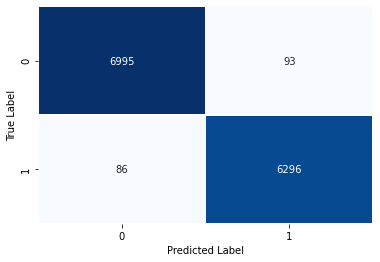

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm_1(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred_LR)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plot_cm_1(y_test, y_pred_LR)

### *Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy')
DT.fit(xv_train, y_train)
DT.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
DT.score(xv_test, y_test)

0.9956198960653304

In [29]:
print(f'{DT.score(xv_test, y_test)*100}%')

99.56198960653305%


In [30]:
print(f'{round(DT.score(xv_test, y_test)*100,2)}% accuracy')

99.56% accuracy


In [31]:
y_pred_DT = DT.predict(xv_test)
confusion_matrix(y_test, y_pred_DT)

array([[7059,   29],
       [  30, 6352]], dtype=int64)

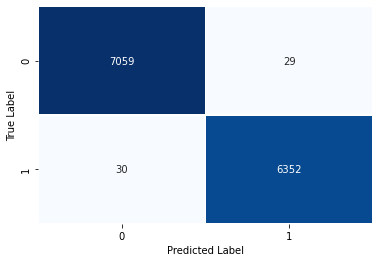

In [32]:
def plot_cm_2(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred_DT)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plot_cm_2(y_test, y_pred_DT)

### *Gradient Boosting 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
GBC.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
GBC.score(xv_test, y_test)

0.9953971789161099

In [35]:
print(f'{GBC.score(xv_test, y_test)*100}%')

99.53971789161099%


In [36]:
print(f'{round(GBC.score(xv_test, y_test)*100,2)}% accuracy')

99.54% accuracy


In [37]:
y_pred_GBC = GBC.predict(xv_test)
confusion_matrix(y_test, y_pred_GBC)

array([[7038,   50],
       [  12, 6370]], dtype=int64)

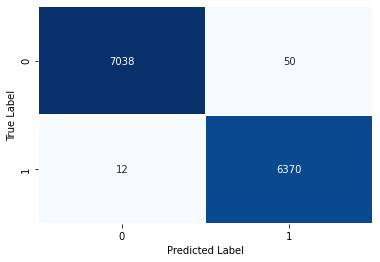

In [38]:
def plot_cm_3(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred_GBC)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plot_cm_3(y_test, y_pred_GBC)

### *Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
RFC.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
RFC.score(xv_test, y_test)

0.9879732739420936

In [41]:
print(f'{RFC.score(xv_test, y_test)*100}%')

98.79732739420936%


In [42]:
print(f'{round(RFC.score(xv_test, y_test)*100,2)}% accuracy')

98.8% accuracy


In [43]:
y_pred_RFC = RFC.predict(xv_test)
confusion_matrix(y_test, y_pred_RFC)

array([[7015,   73],
       [  89, 6293]], dtype=int64)

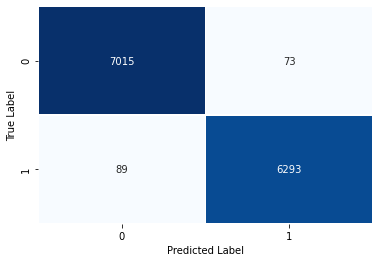

In [44]:
def plot_cm_4(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred_RFC)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plot_cm_4(y_test, y_pred_RFC)

### *Passive Aggressive Classifier

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train, y_train)
PAC.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
PAC.score(xv_test, y_test)

0.9942093541202672

In [47]:
print(f'{PAC.score(xv_test, y_test)*100}%')

99.42093541202672%


In [48]:
print(f'{round(PAC.score(xv_test, y_test)*100,2)}% accuracy')

99.42% accuracy


In [49]:
y_pred_PAC = PAC.predict(xv_test)
confusion_matrix(y_test, y_pred_PAC)

array([[7041,   47],
       [  31, 6351]], dtype=int64)

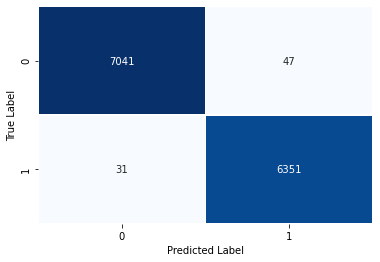

In [50]:
def plot_cm_5(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred_PAC)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plot_cm_5(y_test, y_pred_PAC)

### **Manual Testing

In [51]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorisation.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_PAC = PAC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {}".format(output_label(pred_LR[0]), 
                                                                                                              output_label(pred_DT[0]), 
                                                                                                              output_label(pred_GBC[0]),
                                                                                                              output_label(pred_RFC[0]), 
                                                                                                              output_label(pred_PAC[0])))

In [ ]:
news = str(input())
manual_testing(news)